![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **MONTECARLO SIMULATION - GEOMETRIC BROWNIAN MOTION**

## **¿How can you build a montercarlo simulation for GBM?**

<font size="3"> Montecarlo simulation is a powerful technique that allows you visualize different paths a financial asset could take in the future. You can also use this technique for derivatives pricing. In this notebook we are showing how you can run a montecarlo simulation for a geometric brownian motion in python. Remember that a geometric brownian motion is one of the simplest stochastic processes that are used in finance to model the behavior of stocks and other financial assets. If you would like to know more about the mathematic of this process please look here <a href="https://quant-trading.co/category/tools/" target="_blank">MONTECARLO</a>.<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import rand
import scipy.stats
import matplotlib.pyplot as plt

## **Define all the required parameters**

<font size="3"> We need to define some parameters such as: a) The number of simulations that we are going to run, b) The number of steps to use in each path the asset will follow, c) The spot price of our financial asset, d) The time step in the simulation, e) The risk-free interest rate, f) The volatility of our financial asset. <br><br>

In [3]:
M = 1000               #Number of paths - We are using 1000 paths for illustrative purposes - The more paths, the more accurate.
d = 250                #Number of steps - We are using daily steps. In one year there are apox 250 working days
spot = 100             #Spot price of our asset
T=1                    #Time to maturity - We are using one year
delta_t = T/d          #time step for the simulation. 
r = 0.05               #Interest rate
sigma = 0.12           #Volatility

## **Generate uniformly distributed random variables**

<font size="3"> We can use the rand function to generate uniformly distributed random variables as following <br><br>

In [4]:
y1 = rand(M,d)
y1

array([[0.28396218, 0.75038948, 0.15315103, ..., 0.90952736, 0.15538603,
        0.21657274],
       [0.12956755, 0.30037669, 0.21236115, ..., 0.3558617 , 0.81863316,
        0.66697509],
       [0.02624324, 0.63416169, 0.54681212, ..., 0.41870548, 0.06620359,
        0.35739465],
       ...,
       [0.54241236, 0.88632987, 0.75214238, ..., 0.6676633 , 0.32360664,
        0.51502842],
       [0.59316826, 0.41372319, 0.65946532, ..., 0.25559845, 0.10461699,
        0.65401145],
       [0.8198613 , 0.32016736, 0.32363642, ..., 0.83249163, 0.60138418,
        0.62084087]])

## **Initialize the inverse normal function and generate normal random variables**

<font size="3"> We need to transform the previously generated uniform random variables into normal random variables. We can do that using the inverse normal function as following.<br><br>

In [2]:
norminv = scipy.stats.distributions.norm.ppf         

In [5]:
z1 = norminv(y1)
z1

array([[-0.57111107,  0.67571589, -1.02301222, ...,  1.33785021,
        -1.01360335, -0.78382045],
       [-1.12843775, -0.52331743, -0.79825538, ..., -0.36954251,
         0.91016847,  0.4315757 ],
       [-1.93912209,  0.3428961 ,  0.11761117, ..., -0.20520628,
        -1.50467687, -0.36543154],
       ...,
       [ 0.10651308,  1.2072386 ,  0.68124694, ...,  0.43346994,
        -0.45763698,  0.03767957],
       [ 0.23570256, -0.21797784,  0.41100432, ..., -0.65697514,
        -1.2556746 ,  0.39617341],
       [ 0.91483665, -0.46723087, -0.45755408, ...,  0.96405823,
         0.25693152,  0.30768997]])

## **Create a vector with the initial spot price**

<font size="3"> We need to create a column vector that contains the spot price. The number of rows will be equal to the number of simulations that we are going to run<br><br>

In [6]:
initial_spot_asset1=spot*np.ones((M,1))
initial_spot_asset1[0:7]

array([[100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.]])

## **Create a matrix**

<font size="3"> We need to store the results from our montecarlo simulation, so we create a matrix with M rows and d columns. Then we append the previously created spot vector to it<br><br>

In [7]:
ASSET1 = np.zeros((M,d))
ASSET1 = np.append(initial_spot_asset1,ASSET1,axis=1) 
ASSET1

array([[100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.]])

## **Generate the simulation paths**

<font size="3"> Using the discretized equation of the geometric brownian motion and the matrix of normal random variables we can create the paths for our simulation as follows<br><br>

In [8]:
#Calculate the paths
for i in range(0,M):
    for j in range(0,d):
        ASSET1[i,j+1] = ASSET1[i,j]*np.exp((r-0.5*sigma**2)*delta_t+sigma*np.sqrt(delta_t)*z1[i,j])
        
ASSET1

array([[100.        ,  99.58454259, 100.11369406, ..., 106.69193161,
        105.89245773, 105.28241966],
       [100.        ,  99.16420829,  98.78804996, ...,  91.07551834,
         91.72251952,  92.03919846],
       [100.        ,  98.55595757,  98.82969166, ..., 128.63741768,
        127.19854812, 126.86797849],
       ...,
       [100.        , 100.09800574, 101.03664373, ...,  89.14901388,
         88.85512749,  88.89575848],
       [100.        , 100.19619788, 100.04770349, ...,  99.69700664,
         98.76832465,  99.08270421],
       [100.        , 100.71396889, 100.37464897, ...,  87.56631298,
         87.75225342,  87.97247177]])

## **Plot the results**

<font size="3"> We can plot the results as follows<br><br>

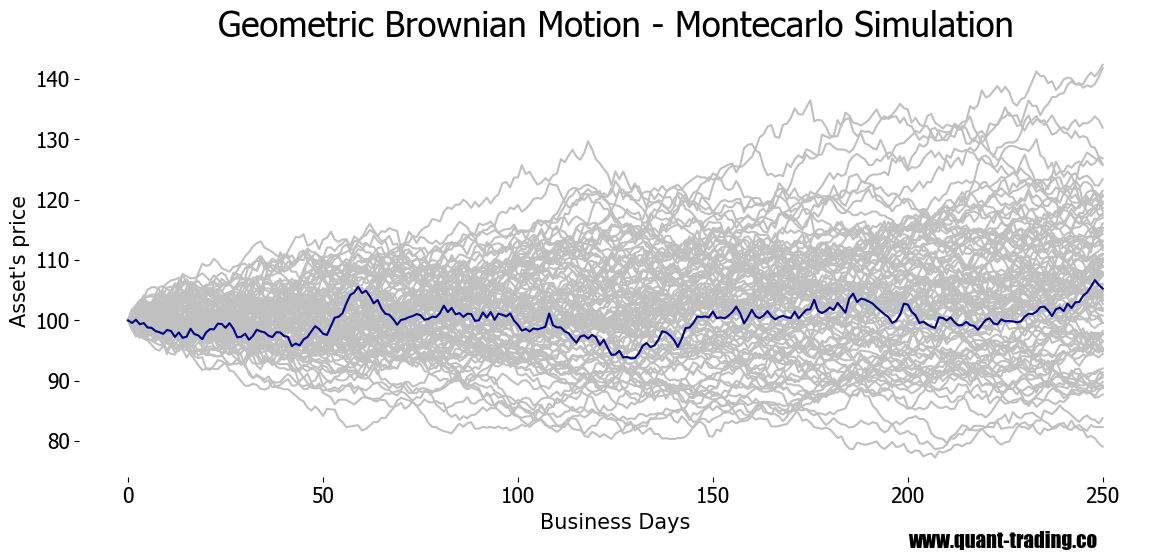

In [9]:
#Plot the paths        

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(ASSET1[0:100,:].transpose(),c='silver')
ax.plot(ASSET1[0:1,:].transpose(),c='darkblue')
ax.set_facecolor('white') 

plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
plt.ylabel("Asset's price",fontsize=15)
plt.xlabel("Business Days",fontsize=15)

plt.title("Geometric Brownian Motion - Montecarlo Simulation", size=25, family='Tahoma')
plt.box(on=None)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)
plt.text(200, np.min(ASSET1[0:100,:])-15,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)